TODO: 1. Explain each line of code
       2. Give add more explanation
       3. Gammar correction

# 1. Frame the Problem and Look at the Big Picture

## 1.1 Define the objective in business terms.

Trying to predict the price for homes in Ames, Iowa

## 1.2 How will your solution be used?

Randomly predict new home house it has never seen before

## 1.3 What are the current solutions/workarounds (if any)?

Nil

## 1.4 How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

Supervised/regression/mutiple regression(because we are prediction using multiple features)/univariate because we are predicting one value/batch learning because there is no continuous flow of data (like for example for a stock price or bitcoin price)

## 1.5 How should performance be measured?

Since we are dealing with a regression  we will be using RMSE

RMSE($X$,*h*) = $\sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^n (h(x^i)-y^i)^2}$

Where 

* n is the number of observation(data point)
* x is the vector of all the feature values excluding the label of *i*th instance in the dataset
* y is the predicted value (label)
* h is the system's prediction function called hypothesis
* RMSE($X$,*h*) is the cost function measured on a set of examples using h

## 1.6 Check for assumptions

No assumption here, the model will be used as a standalone model.

# 2. Get the data

## 2.1 Download data

In [852]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [853]:
%ls

Applied ML/
Control Flow in Python Part 1 - conditional statement and pass statement.ipynb
Control Flow in Python Part 2 - for and while loop.ipynb
Countries_EDA.ipynb
Demystify Machine Learning.ipynb
House price prediction.ipynb
Iterators and range in Python.ipynb
List in python.ipynb
ML project checklist.ipynb
NumPy Crash Course.ipynb
NumPy Exercises Part 1 .ipynb
NumPy Exercises Part 2.ipynb
NumPy Exercises Part 3.ipynb
Pandas Exercise Part 1.ipynb
Pandas Exercise Part 2.ipynb
Pandas Exercise Part 3.ipynb
introduction to python data types, operators and variables.ipynb


In [854]:
house_data_train = pd.read_csv("/Users/semasuka/Desktop/ML/house-prices/train.csv")

## 2.1 Quick look at the data structure

In [855]:
house_data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [856]:
pd.set_option('display.max_columns', None)

In [857]:
house_data_train.head(11)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,No

In [858]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [859]:
house_data_train.shape

(1460, 81)

In [860]:
house_data_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [861]:
house_data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


## 2.2 Features elimination

After analysing the most relevant features, we conclude ***subjectively*** to only keep ```OverallQual```,``` YearBuilt```, ```TotalBsmtSF```, ```GrLivArea``` and exclude the rest as we always want to keep the fewest and most relevant features. 

Why you may ask? because removing irrelevant features result in better perfoming model, easier to understand model and last but not least in a faster model.

We will come back to this a bit later.

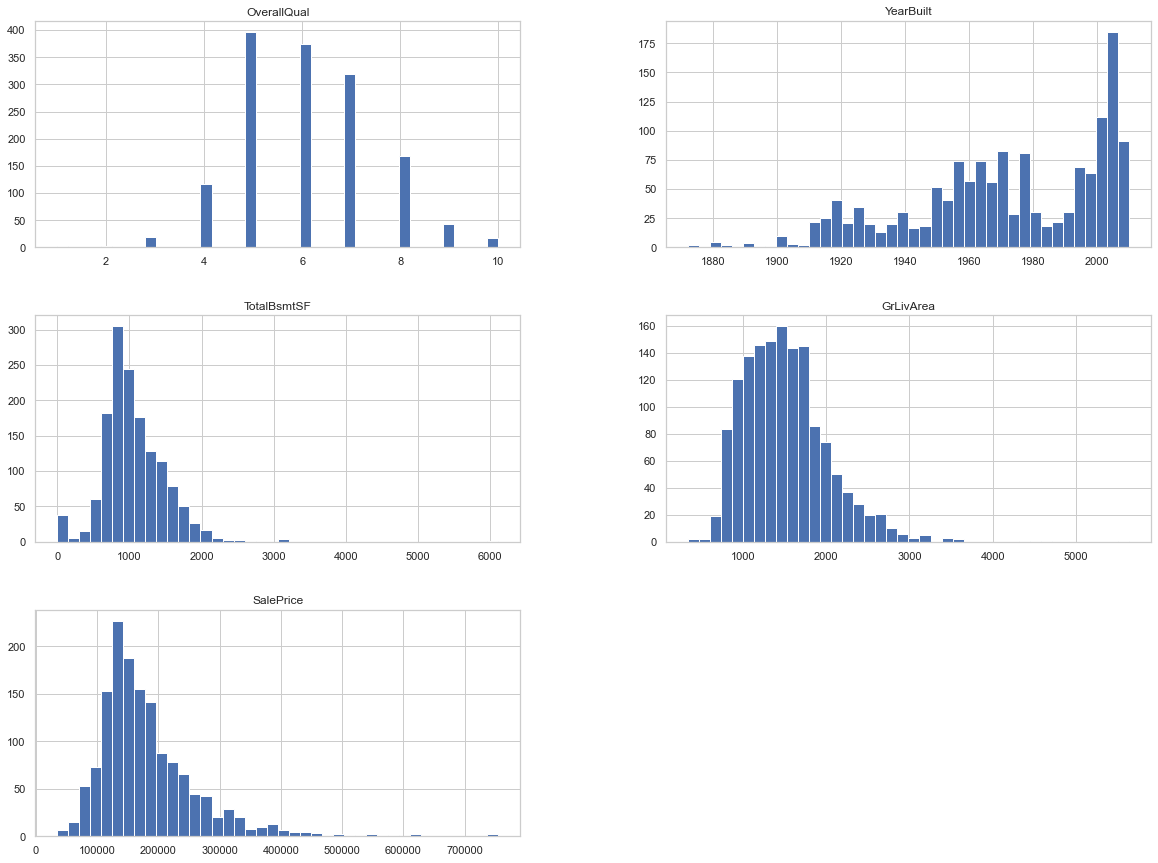

In [862]:
house_data_train[["OverallQual","YearBuilt","TotalBsmtSF","GrLivArea","SalePrice"]].hist(bins=40,figsize=(20,15))
plt.show()

## 2.3 Import the testing data

In this case, the testing and the training data are separeted into different files. If it is not you will need to split the data by yourself as previously mentioned in the last blog post.

In [863]:
house_data_test = pd.read_csv("/Users/semasuka/Desktop/ML/house-prices/test.csv")

## 2.4 Deep dive into EDA

### 2.4.1 Label analysis

Let's first analyze and understand our label which ```SalePrice``` which is the end goal of the whole other it is like driving without any destination. 

In [864]:
house_data_train["SalePrice"].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

We can see that the min is not zero which is a great new as that would mean an outlier

Let's plot this

In [865]:
import seaborn as sns

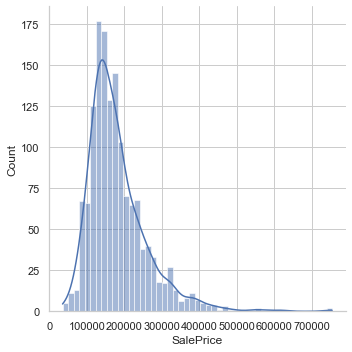

In [866]:
sns.displot(house_data_train["SalePrice"], kde= True)
plt.show()

The line is the KDE (kernel density estamate) which is the line that follow the best the histogram bars

Observation:
    
    * positive skewness
    * Not a gauchain distribution/normal distribution
    * There is a sharp peak

In [867]:
print("Skewness of the plot {}".format(house_data_train["SalePrice"].skew()))
print("Kurtosis of the plot {}".format(house_data_train["SalePrice"].kurtosis()))

Skewness of the plot 1.8828757597682129
Kurtosis of the plot 6.536281860064529


Since the skewness is positive it means that the tail is long on the positive side of numbers 
if the absolute value (unsigned value) of skewness is less than 0.5, we would say that the plot is symmetric, if it is between 0.5 and 1 it a little bit skewed and if it is greater than 
1 then we say it is very skewed. 

![Skewness of a plot](/blog/assets/post_cont_image/skewness.png)
*Credit: [Wikipedia](https://en.wikipedia.org/wiki/Skewness#/media/File:Relationship_between_mean_and_median_under_different_skewness.png){:target="_blank"}*

Kurtosis is the measurement of how sharp is the KDE compare to a normal distribution. If the Kurtosis is a positive number then it means that it has sharp peak that the normal distribution (more pointy), if equal to zero then it means that it is the same as a normal distribution, if negative it means that it is flatter than the normal distribution. 

![Kurtosis of a plot](/blog/assets/post_cont_image/kurtosis.png)
*Credit: [Wikimedia](https://commons.wikimedia.org/wiki/File:Standard_symmetric_pdfs.png){:target="_blank"}*

### 2.4.2 Relationship between the label and the rest of the features

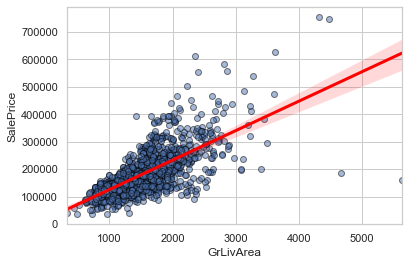

In [868]:
sns.regplot(x=house_data_train["GrLivArea"],y=house_data_train["SalePrice"],line_kws={"color":"red","linewidth":3},scatter_kws={"alpha":0.5,"edgecolor":"black"})
plt.show()

We can see a linear relationship between the two

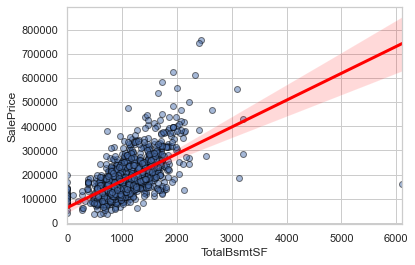

In [869]:
sns.regplot(x=house_data_train["TotalBsmtSF"],y=house_data_train["SalePrice"],line_kws={"color":"red","linewidth":3},scatter_kws={"alpha":0.5,"edgecolor":"black"})
plt.show()

We can see that there is an exponential relationship between the two as we can see using the ci

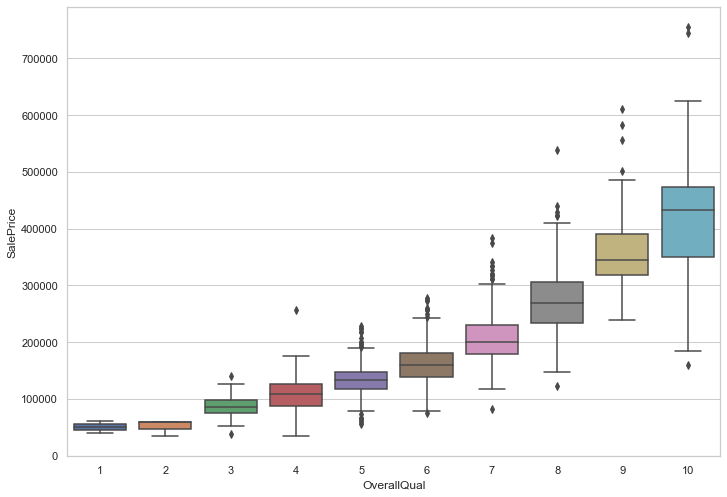

In [870]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.set_style("whitegrid")
sns.boxplot(x=house_data_train["OverallQual"],y=house_data_train["SalePrice"],data=house_data_train)
plt.show()

The more the quality increase, the more price increase

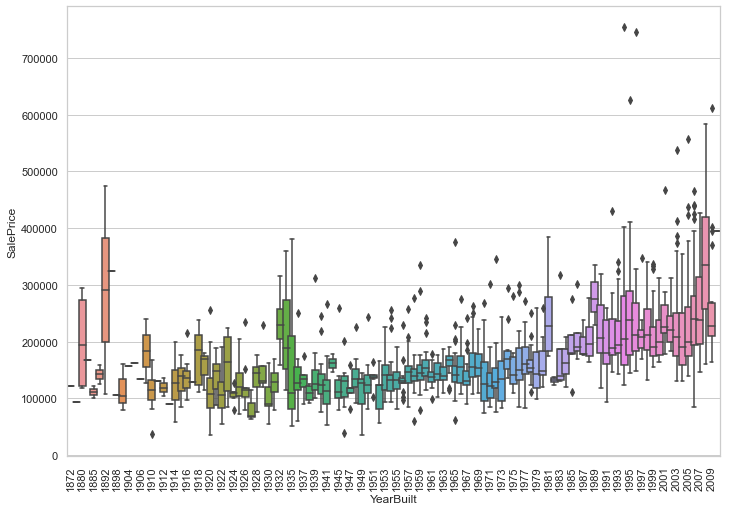

In [871]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.set_style("whitegrid")
sns.boxplot(x=house_data_train["YearBuilt"],y=house_data_train["SalePrice"],data=house_data_train, width=1.2)
plt.xticks(rotation=90);
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
plt.show()

Although there is no strong correllation, but newer homes tend to cost a little bit more than the old one but there are some exception lin the homes built around 1880,1893,1933 to 1935,1982

Note: we can't if the price of the house is adjusted for inflation, since it is not metionned we will assume that it is adjusted to the inflation

In conclusion, we can see that there is a linear relationship between ```SalePrice``` and ```GrLivArea```. We have linear relationship trending to an exponential relationship between ```SalePrice``` and ```TotalBsmtSF```

There is a strong correlation too between ```OverallQual``` and ```SalesPrice``` but not so much with ```YearBuilt```

### 2.4.3 Less subjective feature selection

As the first feature selection we did was just subjective with our owened biases on what features we thought would influence the ```SalesPrice```. But there are two issues with this approach, 1. We are by no means real estate expert(well that is what I would believe if you are reading this blog) 2. We might have overlooked some important feature that do actually corralate with the ```SalesPrice```.

That is why it is always a great idea to call upon the power of a heatmap to see clearly the correlations between columns in the dataset. The other advantage of using a heatmap, is that it can also detect multicollinearity which means the correlation between the features themselves. 

*************** create a one hot encoding for the categorical data ***************

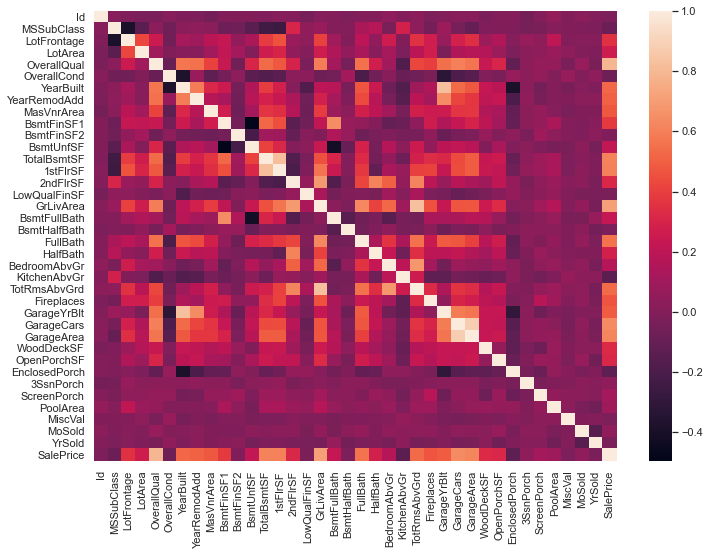

In [872]:
corrmat = house_data_train.corr()
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.heatmap(corrmat)
plt.show()

After analysing the heatmap we can see that there are some features that are correlated with ```SalesPrice``` that we have completely missed like the ```TotalBsmtSF```, ```1stFlrSF```,```FullBath```, ```TotRmsAbvGrd```, ```GarageCars``` and ```GarageArea```.

Now let's select the top 10 most correlated features to the ```SalesPrice``` and plot a mini heatmap of those features.

In [873]:
corrmat_abs = corrmat.abs()

In [874]:
corrmat_abs_srtd = corrmat_abs.unstack().sort_values(kind="quicksort",ascending=False)

In [875]:
corrmat_abs_srtd["SalePrice"][:10]

SalePrice      1.000
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
dtype: float64

In [876]:
top_corr_cols = corrmat_abs_srtd["SalePrice"][:10].index  

In [877]:
top_corr_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [878]:
corr_coe_top_col = house_data_train[top_corr_cols].corr()

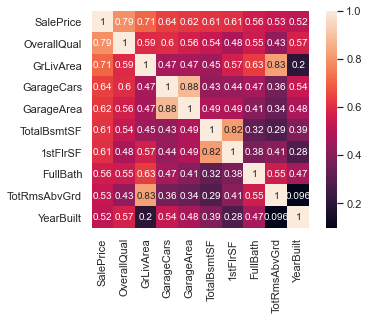

In [879]:
sns.heatmap(corr_coe_top_col, annot=True, square=True, xticklabels=top_corr_cols, yticklabels=top_corr_cols)
plt.show()

Let's look into this a little bit closely, 

1. ```OverallQual```, ```YearBuilt```,```GrLivArea``` and ```TotalBsmSF``` will be kept as they are strongly correlated.
2. ```GarageCars``` and ```GarageArea``` are multicollinearity, so we can keep only one and discard the other one of two. We will keep ```GarageCars``` as it is the most correlated to to the ```SalesPrice```
3. ```FullBath``` there is a no so strong correlation between this feature and the ```SalesPrice``` but We will keep it.
4. ```TotalBsmSF``` and ```1stFlrSF``` are strongly correlated, we will disregard ```1stFlrSF``` 

In [880]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    bst_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
    sns.pairplot(house_data_train[bst_cols],
                 diag_kind="kde", 
                 kind="reg",
                 plot_kws={
                   'line_kws':{
                       'color':'red'
                   },
                   'scatter_kws':{
                       'edgecolor':'black'
                   },
                 },
                 height=height,
                 aspect=aspect)
    plt.show()

In [881]:
interactive(size_widget, height=(1,3.5,0.5),aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

Through the pairplot, we can see interesting observations

1. ```TotalBsmtSF``` and ```GrLiveArea``` we can see that there is a perfect linear correlation for some of datapoints because in most of the homes the total basement square feet is the same as ground living area. That why we can see that straight line of points and also the reason why almost all the points are under that line because the ground living area is a part of the total basement area.

2. ```YearBuilt```and ```SalePrice``` we can see a not so clear exponetioal relationship here. We can see that the houses that were built before 1900 usually don't sell more \\$200000 but we can also observe that the most of the new houses sell with a sticker price of more than \\$200000. 

### 2.4.4. Missing Data

Since we don't live in a perfect world, most of the real-world data have missing value. It is never fun to deal with a dataset with missing datas. It is like unpacking a jigsaw puzzle to find out that there 10% of pieces missing. This is very frustating and can ultimately interfere with the analysis and the final predictions. 

But before we start investigation on the missing data, there are two question to ask ourselves when we are dealing with missing data

1. How widespread are missing data in our relevant columns
2. It is randomly spread or is there a pattern

Now let's get our hands dirty.

We will look at the number of ```NaN``` we have in our dataset

In [882]:
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can look at it visually by using the ```missingno``` library but in this case it wont provide much info because we have a lot of features. 

In [883]:
import missingno as msno

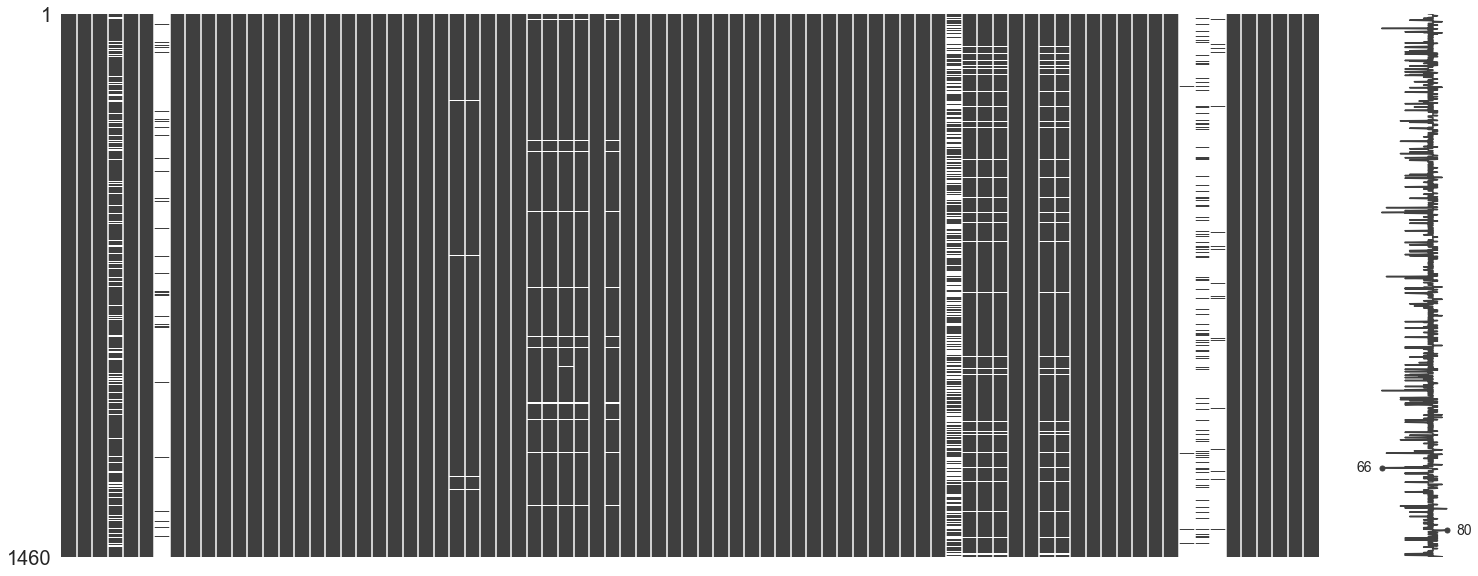

In [884]:
msno.matrix(house_data_train)
plt.show()

Seems like we have quite a number of missing on this data set, but this does not give us much perspective of the number of ```NaN``` relative to number or datapoints in each column.

In [885]:
house_data_train.shape[0]

1460

In [886]:
nan_count = house_data_train.isna().sum().sort_values(ascending=False).to_frame()
real_number_count = house_data_train.shape[0] - nan_count
real_number_count

,0
PoolQC,7
MiscFeature,54
Alley,91
Fence,281
FireplaceQu,770
...,...
ExterQual,1460
Exterior2nd,1460
Exterior1st,1460
RoofMatl,1460


In [887]:
np.set_printoptions(suppress=True)
nan_perc = pd.DataFrame((nan_count.values*100/house_data_train.shape[0]))

In [888]:
nan_count_perc = pd.concat([nan_count.reset_index(drop=True),number_count.reset_index(drop=True),nan_perc.reset_index(drop=True)],axis=1).set_index(nan_count.index)
nan_count_perc.columns = ["NaN count","real_number_count","NaN percentage"]

In [889]:
nan_count_perc

,NaN count,real_number_count,NaN percentage
PoolQC,1453,7,99.521
MiscFeature,1406,54,96.301
Alley,1369,91,93.767
Fence,1179,281,80.753
FireplaceQu,690,770,47.260
...,...,...,...
ExterQual,0,1460,0.000
Exterior2nd,0,1460,0.000
Exterior1st,0,1460,0.000
RoofMatl,0,1460,0.000


In [890]:
pd.set_option('display.max_rows', 25)
nan_count_perc.head(25)

,NaN count,real_number_count,NaN percentage
PoolQC,1453,7,99.521
MiscFeature,1406,54,96.301
Alley,1369,91,93.767
Fence,1179,281,80.753
FireplaceQu,690,770,47.260
LotFrontage,259,1201,17.740
GarageYrBlt,81,1379,5.548
GarageCond,81,1379,5.548
GarageType,81,1379,5.548
GarageFinish,81,1379,5.548


Now we can clearing see what is hidden! using the table above, we can see some of the observation.

1. ```PoolQc``` has 1453 missing values (99.52% of missing), 7 usable data which constitute less than 0.5% of all the entries. A good rule of thumbs is to always drop all the columns that have more that 15% of missing data and just pretend as if it never existed. So in this case we can drop ```PoolQC```,```MiscFeature```,```Alley```,```Fence```,```FireplaceQu```, ```LotFrontage```. Either way none of these features have a low correlation with ```SalesPrice``` and are not factors the average joe considers when thinking buying a home.

2. Looking at all the garage obersavertion ```GarageX``` we can see that we have exactly the same number of missing element. Something is telling me that those missing values are from the same observations. Since we have seen that the most usefull information about the garage is the ```GarageCar``` (since it is the most corralated to ```SalesPrice```), we will drop all those feature ```GarageX```. We will do the same for the ```BsmtQual``` and ```BsmtCond``` since we already have ```TotalBsmtSF```.


4. For the ```Electrical``` feature since it is only one element missing, we will fill it with the mode which is the most common value within that column. In this case, we will fill that missing value with ```SBrkr``` which is the most common element in the column

In [891]:
cols_to_drop = nan_count_perc[nan_count_perc["NaN count"] > 1].index

In [892]:
house_data_train.drop(cols_to_drop, axis='columns', inplace=True)

In [893]:
most_common_value_el = house_data_train["Electrical"].value_counts().index[0]

In [894]:
house_data_train["Electrical"].replace(np.nan,most_common_value_el,inplace=True)

In [895]:
house_data_train["Electrical"].isna().any()

False

In [896]:
house_data_train.isna().any().sum()

0

We have removed all the missing data, let's visualize this.

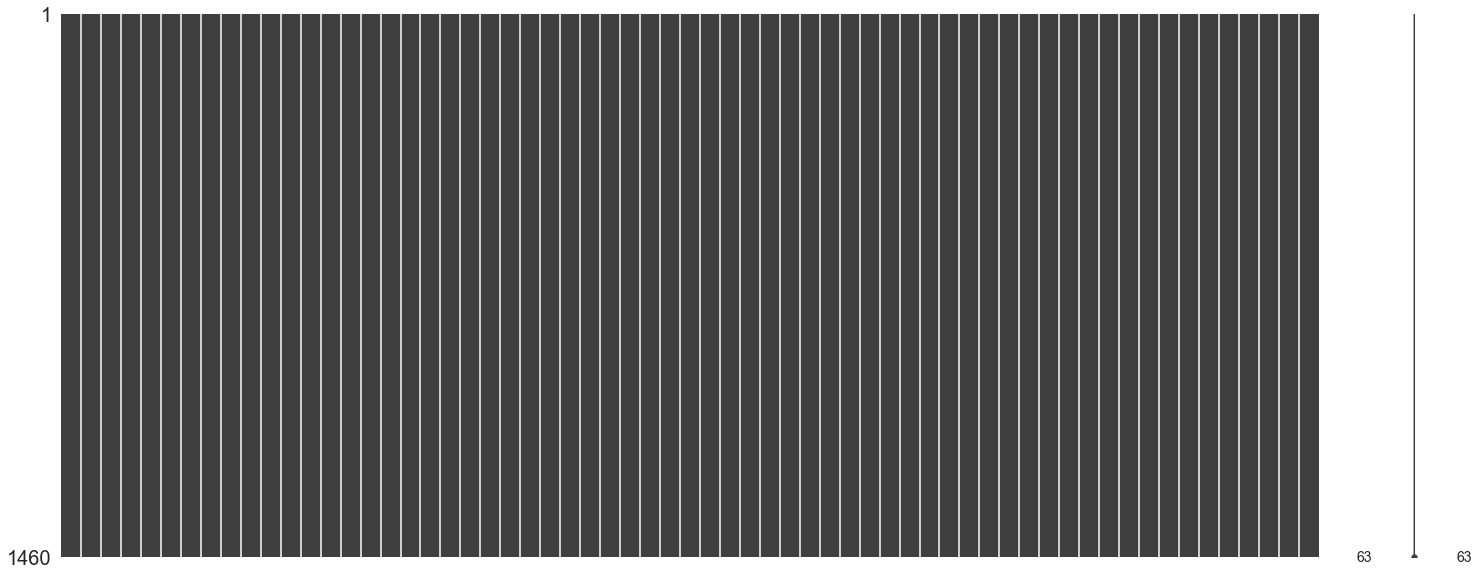

In [897]:
msno.matrix(house_data_train)
plt.show()

### 2.4.5 Outliers

Outliers are observations that lies at an abnormal distance from other values in a population sample. These observations can affect negatively our model leading to innacurate predictions and always needs to be dealt with. 

#### 2.4.5.1 Univariate analysis

Univariate analysis means that we are going to analyse only one feature (the label). We need to find out if a data point is an outlier or not by coming with threshold that will flag a datapoint as an outlier. We will standardize (this redistributes the features with their mean $\mu$ equal to 0 and standard deviation $\sigma$ equal to 1. Standarization is one of the [feature scaling methods](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In [898]:
from sklearn.preprocessing import StandardScaler

In [899]:
saleprice_scaled = StandardScaler().fit_transform(house_data_train["SalePrice"].values.reshape(-1,1))

In [900]:
saleprice_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [901]:
low_range = sorted(saleprice_scaled,key=lambda x: x[0])[:20]
high_range = sorted(saleprice_scaled,key=lambda x: x[0])[-20:]

In [902]:
low_range

[array([-1.83870376]),
 array([-1.83352844]),
 array([-1.80092766]),
 array([-1.78329881]),
 array([-1.77448439]),
 array([-1.62337999]),
 array([-1.61708398]),
 array([-1.58560389]),
 array([-1.58560389]),
 array([-1.5731]),
 array([-1.54153178]),
 array([-1.52264373]),
 array([-1.52264373]),
 array([-1.52264373]),
 array([-1.51005169]),
 array([-1.49263691]),
 array([-1.46597958]),
 array([-1.44079551]),
 array([-1.43449949]),
 array([-1.43449949])]

In [903]:
high_range

[array([3.08604046]),
 array([3.1364086]),
 array([3.226492]),
 array([3.24696665]),
 array([3.26232893]),
 array([3.34116765]),
 array([3.41280373]),
 array([3.57712976]),
 array([3.59601781]),
 array([3.70305009]),
 array([3.82897043]),
 array([4.04098249]),
 array([4.49634819]),
 array([4.71041276]),
 array([4.73032076]),
 array([5.06214602]),
 array([5.42383959]),
 array([5.59185509]),
 array([7.10289909]),
 array([7.22881942])]

We can see that most of the low range are close to 0 and that on the other hands, the high range straights very far from the mean 0, up to 7. We can consider that the two values around 7 are outliers but we will keep them for now. 

We can visualize this on a histogram.

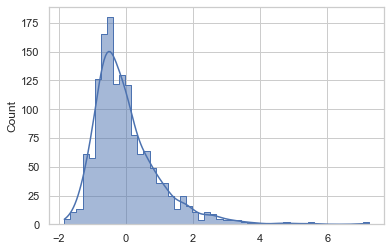

In [904]:
sns.histplot(saleprice_scaled,bins=50, kde=True, legend=False,element="step")
plt.show()

#### 2.4.5.1 Bivariate analysis

Looking at the pairplot, we can clearly see that some of the plots (```GrLivArea``` and ```TotalBsmtSF```) seem to have Outliers. let's look at it a little bit more. 

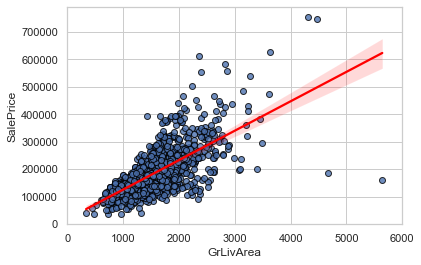

In [907]:
sns.regplot(x=house_data_train["GrLivArea"],y=house_data_train["SalePrice"],scatter_kws={"edgecolor":"black"},line_kws={"color":"red"})
plt.xlim([0,6000])
plt.show()

By observing the plot, we can deduct few informations:
    
    1. the two values on the far bottom right seems to be outliers because logically, these observation seems to have large ground living area but were sold at a very low price. One assumption we can make is that these house are located in a non residential area therefore this might justify the low price.
    
    2. The other two observation are found at the top right of the plot, these two observation even though they are far from the rest of the observations they seems to follow our linear regression line therefore we should keep them.

In [908]:
outlier_idx = house_data_train.sort_values(by = 'GrLivArea', ascending = False)[:2]['GrLivArea'].index

In [913]:
house_data_train.drop(outlier_idx, inplace=True)

Now let's plot it without the outliers.

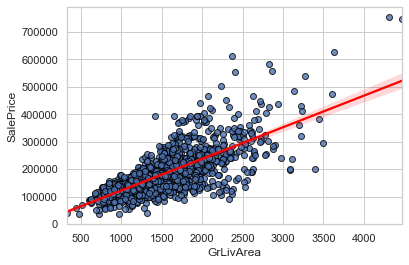

In [917]:
sns.regplot(x=house_data_train["GrLivArea"],y=house_data_train["SalePrice"],scatter_kws={"edgecolor":"black"},line_kws={"color":"red"})
plt.show()

Let's plot now for the ```TotalBsmtSF```

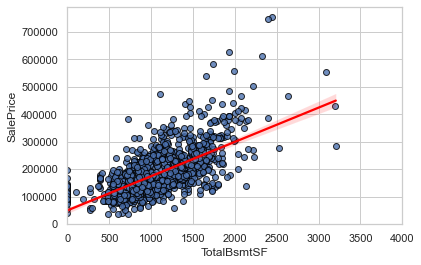

In [919]:
sns.regplot(x=house_data_train["TotalBsmtSF"],y=house_data_train["SalePrice"],scatter_kws={"edgecolor":"black"},line_kws={"color":"red"})
plt.xlim([0,4000])
plt.show()

We can see some few observation away of the cluster but these obersavertion are not that far (or strange) to be considered as outliers.

### 2.4.6 Deep understanding of the label

We need to understand deeply the labal by testing the assumptions underlying the statistical bases for a multivariate analysis

In [1]:
https://www.youtube.com/watch?v=VvlqA-iO2HA&list=PLTNMv857s9WUI1Nz4SssXDKAELESXz-bi&index=7&t=1060s&ab_channel=zedstatistics

SyntaxError: invalid syntax (<ipython-input-1-b6eaf5020a35>, line 1)

In [ ]:
Continue the play list as regression output explanation

In [ ]:
Kaggle 

In [2]:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

SyntaxError: invalid syntax (<ipython-input-2-00fa04b1a5f3>, line 1)

In [3]:
continue to use the handson ML book to predict this notebook

SyntaxError: invalid syntax (<ipython-input-3-0b0247497410>, line 1)